# Data Exploration
## Questions
1. What are the Top 3 most popular words/themes in movie plot per genre? And per year?
2. What is the pay gap between male and female actors per country and globally?

`TODO`: https://visualstudio.microsoft.com/visual-cpp-build-tools/ to make this work: https://www.datacamp.com/tutorial/wordcloud-python

In [2]:
# Dependencies
import pandas as pd
from pathlib import Path

## Top 3 most popular themes

In [9]:
# Import datasets
omdb_csv = Path('Datasets/omdb.csv')
omdb_df = pd.read_csv(omdb_csv)

movies_csv = Path('Datasets/movies.csv')
movies_df = pd.read_csv(movies_csv)

In [12]:
omdb_df.columns

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type',
       'DVD', 'BoxOffice', 'Production', 'Website', 'Response', 'Error',
       'totalSeasons'],
      dtype='object')

In [13]:
movies_df.columns

Index(['movieid', 'title', 'mpaa_rating', 'budget', 'gross', 'release_date',
       'genre', 'runtime', 'rating', 'rating_count', 'summary'],
      dtype='object')

In [8]:
omdb_df['Plot']

0      After a single, career-minded woman is left on...
1      An old Jewish woman and her African-American c...
2      A detective must adopt a rambunctious dog in o...
3      The biography of Ron Kovic. Paralyzed in the V...
4      Iowa farmer Ray Kinsella is inspired by a voic...
                             ...                        
631    When Earth becomes uninhabitable in the future...
632    As Steve Rogers struggles to embrace his role ...
633    The fragile peace between apes and humans is t...
634    A group of intergalactic criminals must pull t...
635    A vengeful fairy is driven to curse an infant ...
Name: Plot, Length: 636, dtype: object

In [11]:
movies_df['summary']

0      After a single, career-minded woman is left on...
1      An old Jewish woman and her African-American c...
2      Det. Scott Turner (Tom Hanks) is an uptight, b...
3      The biography of Ron Kovic. Paralyzed in the V...
4      An Iowa corn farmer, hearing voices, interpret...
                             ...                        
631    A team of explorers travel through a wormhole ...
632    As Steve Rogers struggles to embrace his role ...
633    A growing nation of genetically evolved apes l...
634    A group of intergalactic criminals must pull t...
635    A vengeful fairy is driven to curse an infant ...
Name: summary, Length: 636, dtype: object

## Gender pay gap

In [4]:
# Import data
actor_csv = Path('Datasets/actor.csv')
actor_df = pd.read_csv(actor_csv)

In [11]:
# Clean data = remove unecessary column + drop all rows with NaN
clean_actor_df = actor_df[['name', 'date_of_birth', 'birth_country', 'gender', 'networth']]
clean_actor_df = clean_actor_df.dropna(axis=0,how='any')
clean_actor_df

,name,date_of_birth,birth_country,gender,networth
0,Aaron Eckhart,1968-03-12,USA,Male,16000000.0
1,Aasif Mandvi,1966-03-05,India,Male,3000000.0
2,Abe Vigoda,1921-02-24,USA,Male,10000000.0
3,Abigail Breslin,1996-04-14,USA,Female,8000000.0
4,Abraham Benrubi,1969-10-04,USA,Male,12000000.0
...,...,...,...,...,...
2582,Zac Efron,1987-10-18,USA,Male,25000000.0
2583,Zach Braff,1975-04-06,USA,Male,20000000.0
2585,Zachary Levi,1980-09-29,USA,Male,12000000.0
2586,Zachary Quinto,1977-06-02,USA,Male,20000000.0


### Preliminary questions
- How many men and women?
- What is the average net worth per gender?
- Who are the Top 10 men and women actors in terms of net worth?
- Where are the actors from?

In [21]:
# Create a DataFrame per gender
actor_m_df = clean_actor_df.loc[clean_actor_df['gender'] == 'Male',:]
actor_f_df = clean_actor_df.loc[clean_actor_df['gender'] == 'Female',:]

# Count number of data points
print(f"There are {len(actor_m_df)} male actors in the dataset.")
print(f"There are {len(actor_f_df)} female actors in the dataset.")

There are 497 male actors in the dataset.
There are 257 female actors in the dataset.


In [38]:
# Calculate the mean net worth for M and F actors
avg_networth_m = actor_m_df['networth'].mean()
avg_networth_f = actor_f_df['networth'].mean()

# Display results
print(f"Male actors' average net worth is ${avg_networth_m:,.0f}")
print(f"Female actors' average net worth is ${avg_networth_f:,.0f} ({100*avg_networth_f/avg_networth_m:.2f}% of Male actors' net worth)")

Male actors' average net worth is $111,911,509
Female actors' average net worth is $29,617,704 (26.47% of Male actors' net worth)


In [61]:
# Top 10 richest actors
top10_m = actor_m_df.sort_values('networth', ascending=False).head(10)
top10_f = actor_f_df.sort_values('networth', ascending=False).head(10)

<Axes: >

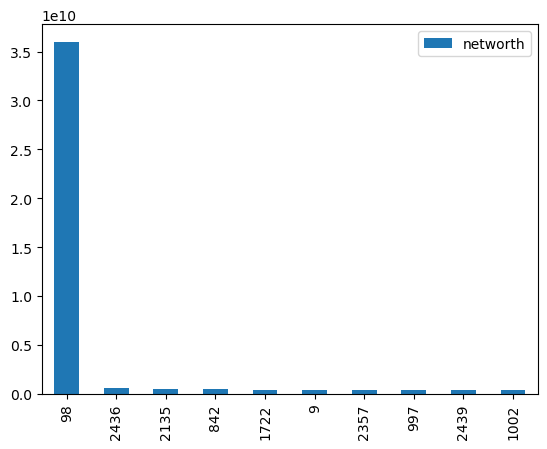

In [62]:
top10_m.plot.bar()

### Notes
- The data for male actors is dominated by a single actor (Alan Howard) that is significantly richer than all the others
- As the goal is to compare representative male actors to female one, we decided to remove this outlier for this part of the comparative analysis

<Axes: >

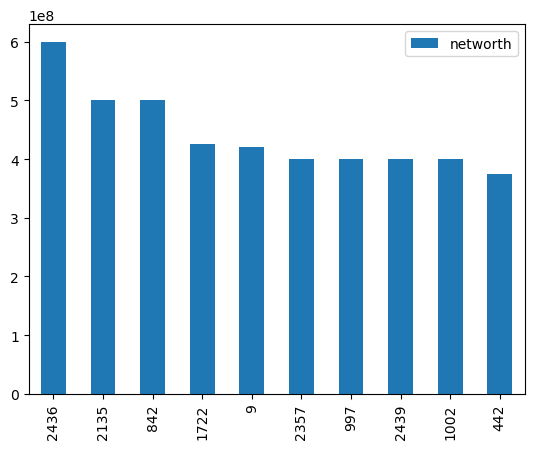

In [65]:
# Top 10 richest actors (remove outlier)
top10_m = actor_m_df.sort_values('networth', ascending=False).head(11).tail(10)
top10_m.plot.bar()

<Axes: >

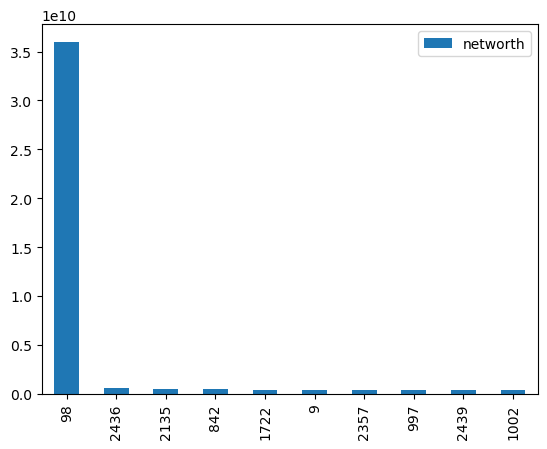

<Axes: >

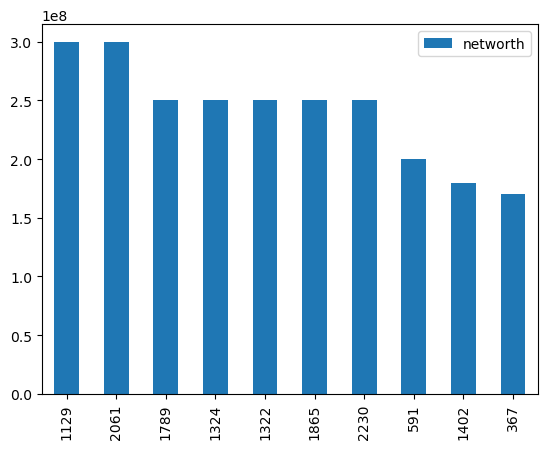

In [59]:
top10_f.plot.bar()

In [68]:


import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Code from: https://python.plainenglish.io/how-to-create-a-beautify-tornado-chart-in-python-plotly-6c0519e185b4
top10 = [1,2,3,4,5,6,7,8,9,10]
sr1 = top10_m['networth'].to_list()
sr2 = top10_f['networth'].to_list()

#convert sr1
def Convert(lst):
    return [ -i for i in lst ]

sr3 = Convert(sr2)
fig = go.Figure()

fig.add_trace(go.Bar(y=top10, x=sr1,
                base=0,
                marker_color='rgb(158,202,225)',
                name='Male Actors',
                marker_line_color='rgb(8,48,107)',
                orientation='h',
                marker_line_width=1.5,
                opacity= 0.7,
                text = sr1,
                textposition='auto',
                texttemplate = "%{x:,s}(M$) "
))

fig.add_trace(go.Bar(y=top10, x=sr2,
                base=sr3,
                marker_color='crimson',
                name='Female Actors',
                marker_line_color='red',
                orientation='h',
                marker_line_width=1.5,
                opacity= 0.7,
                text = sr3,
                textposition='auto',
                texttemplate = "%{x:,s}(M$) "
))

fig.update_layout(
    height=500,
     margin=dict(t=50,l=10,b=10,r=10),
title_text="Gender Pay Gap (Top 10 Actors)",
 title_font_family="sans-serif",
 #legend_title_text=’Financials’,
 title_font_size = 25,
 title_font_color="darkblue",
 title_x=0.5 #to adjust the position along x-axis of the title
)
fig.update_layout(barmode='overlay', 
                  xaxis_tickangle=-45, 
                   legend=dict(
                     x=0.80,
                     y=0.01,
 bgcolor='rgba(255, 255, 255, 0)',
 bordercolor='rgba(255, 255, 255, 0)'
 ),
                  yaxis=dict(
 title='Top Actors',
 titlefont_size=16,
 tickfont_size=14
 ),
                  bargap=0.30)
fig.show()